# Weight range target

Example for 5 units into the future. 

Price example for 10 units: 10, 12, 13, 16, 17, 16, 13, 10, 8, 5

At 10 units, next 5 are 12, 13, 16, 17, 16. Want 16 reduced to 10. Solution: Take difference:

At 10 units, next 5 are 2, 3, 6, 7, 6. (5-pos)/5 weight for each value. 

Highest weighted value - lowest weight value is value proposition (vp). 

Plan: 

map(lambda x, p: ((n-p)/n) * x, list[x], range(len(list(x))))

Then map relative strength using log: ln(vp)/ln(close)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import usefulfunctions as uf
from ta.trend import SMAIndicator

In [25]:
df = pd.read_csv("../data/BTCUSDT-hour-test-all-features.csv")

In [42]:
def get_target(df, span=200):
    """gets the balanced value proposition (highest gain over next 200 - lowest low)"""
    acc = []
    df_len = len(df["close"])

    for i in range(len(df["close"])):

        if i+span < df_len:
            close = df["close"].iloc[i]
            c = df["close"][i:i+span]
            a = list(map(lambda x: x-close, c))
            b = list(map(lambda x, p: ((span-p)/span)*x, a, range(span)))
            
            acc.append(uf.log_abs(max(b) + min(b), zeros=True)/uf.log_abs(close))
        else:
            acc.append(None)

    return acc

def get_sma_rate(df, span=50):
    """returns sma rate list"""
    sma_i = SMAIndicator(close=df["close"], window=span)
    sma = sma_i.sma_indicator()
    past = sma.shift(1)
    return list(map(uf.none_subtraction, sma, past))

def dissuade_from_buying_up(df, span=50, limit=0):
    """prevents buying when span sma's slope is greater than limit"""
    df["sma_rate"] = get_sma_rate(df, span)
    return list(map(lambda sma, t: t if sma<limit else -1,df["sma_rate"], df["target"]))

    


In [43]:
df["target"] = get_target(df)
df["target"] = dissuade_from_buying_up(df, 50, 0)

In [44]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,target,sma_rate
0,2017-08-20 03:00:00.000,4111.26,4111.26,4094.62,4094.62,0.347647,1503201599999,1.428515e+03,3.0,0.347647,...,4091.778090,3.085812,-62.555562,-52.304596,-10.250966,-0.729024,-0.731695,-4.971419,-1.0,NaN
1,2017-08-20 04:00:00.000,4094.62,4094.62,4091.80,4093.00,0.809243,1503205199999,3.313402e+03,37.0,0.809243,...,4091.786679,2.325000,-64.886401,-54.820957,-10.065444,-0.039564,-0.039572,-5.009016,-1.0,NaN
2,2017-08-20 05:00:00.000,4087.00,4142.16,4087.00,4117.41,10.743056,1503208799999,4.412284e+04,69.0,9.067067,...,4092.578888,2.235702,-55.814845,-55.019735,-0.795110,0.596384,0.594613,-4.442505,-1.0,NaN
3,2017-08-20 06:00:00.000,4117.41,4117.41,4081.19,4115.41,2.915551,1503212399999,1.194553e+04,43.0,2.364551,...,4093.238252,0.712627,-56.310248,-55.277837,-1.032410,-0.048574,-0.048586,-4.488922,-1.0,NaN
4,2017-08-20 07:00:00.000,4081.40,4156.56,4081.40,4155.87,14.136060,1503215999999,5.815740e+04,126.0,7.907226,...,4097.177297,1.956517,-44.320642,-53.086398,8.765757,0.983134,0.978333,-3.549920,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494.0,2843.709612,...,58192.413943,-0.860775,8.795727,1.236868,7.558859,-2.284197,-2.310689,1236.786784,-1.0,6.5712
32458,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969.0,2172.633797,...,58196.772678,0.558279,10.887349,3.166964,7.720385,1.356375,1.347258,1254.918621,-1.0,24.5602
32459,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370.0,1870.545827,...,58209.197246,1.764074,10.300546,4.593680,5.706866,0.886999,0.883088,1266.936732,-1.0,36.2098
32460,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800.0,1551.876404,...,58217.480935,2.173669,7.799132,5.234771,2.564362,0.274351,0.273975,1270.686938,-1.0,46.8508


In [51]:
dp = df[30000:31000]

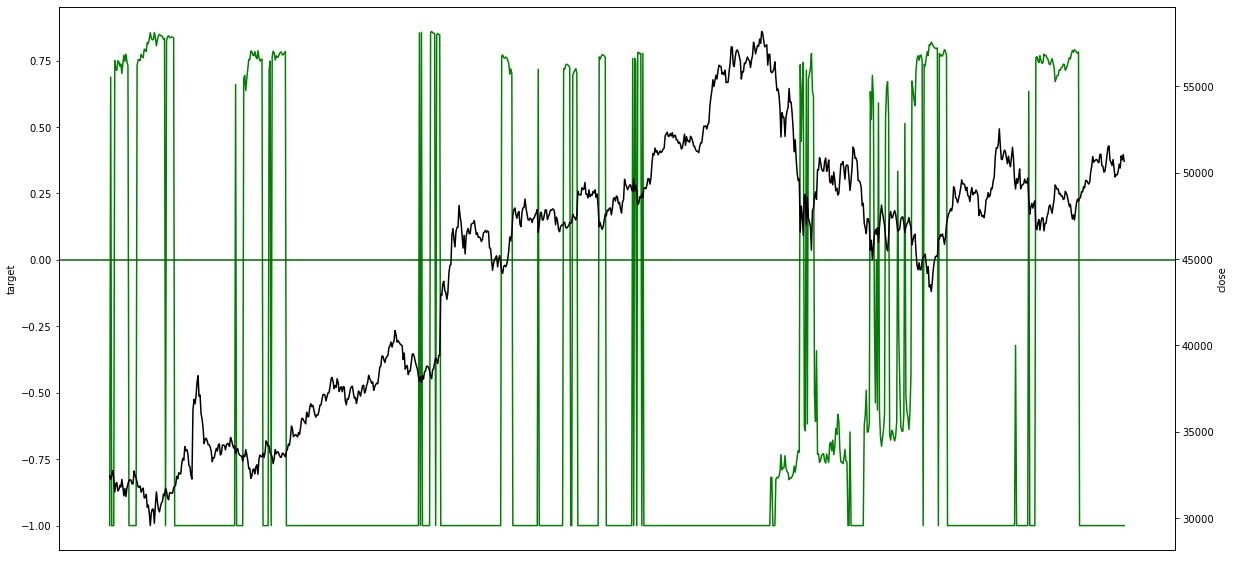

In [52]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(dp.timestamp,
        dp.target,
        color="green")
ax.axhline(y=0, color='darkgreen', linestyle='-')
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(dp.timestamp,
         dp.close,
         color="black")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()